In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
#Read the usda_concatenated data file
usda_df = pd.read_csv("staging/usda_concatenated.csv")
usda_df.tail(20)

,WasdeNumber,ReportDate,ReportTitle,Attribute,ReliabilityProjection,Commodity,Region,MarketYear,ProjEstFlag,AnnualQuarterFlag,Value,Unit,ReleaseDate,ReleaseTime,ForecastYear,ForecastMonth
408018,631,Dec-22,World Wheat Supply and Use,Domestic Feed,NaN,Wheat,United States,2022/23,Proj.,Annual,1.36,Million Metric Tons,12/9/2022,00:00.0,2022,12
408019,631,Dec-22,World Wheat Supply and Use,Domestic Total,NaN,Wheat,United States,2022/23,Proj.,Annual,29.75,Million Metric Tons,12/9/2022,00:00.0,2022,12
408020,631,Dec-22,World Wheat Supply and Use,Ending Stocks,NaN,Wheat,United States,2022/23,Proj.,Annual,15.54,Million Metric Tons,12/9/2022,00:00.0,2022,12
408021,631,Dec-22,World Wheat Supply and Use,Exports,NaN,Wheat,United States,2022/23,Proj.,Annual,21.09,Million Metric Tons,12/9/2022,00:00.0,2022,12
408022,631,Dec-22,World Wheat Supply and Use,Imports,NaN,Wheat,United States,2022/23,Proj.,Annual,3.27,Million Metric Tons,12/9/2022,00:00.0,2022,12
408023,631,Dec-22,World Wheat Supply and Use,Production,NaN,Wheat,United States,2022/23,Proj.,Annual,44.90,Million Metric Tons,12/9/2022,00:00.0,2022,12
408024,631,Dec-22,World Wheat Supply and Use,Beginning Stocks,NaN,Wheat,World,2022/23,Proj.,Annual,276.27,Million Metric Tons,12/9/2022,00:00.0,2022,12
408025,631,Dec-22,World Wheat Supply and Use,Domestic Feed,NaN,Wheat,World,2022/23,Proj.,Annual,154.91,Million Metric Tons,12/9/2022,00:00.0,2022,12
408026,631,Dec-22,World Wheat Supply and Use,Domestic Total,NaN,Wheat,World,2022/23,Proj.,Annual,789.53,Million Metric Tons,12/9/2022,00:00.0,2022,12
408027,631,Dec-22,World Wheat Supply and Use,Ending Stocks,NaN,Wheat,World,2022/23,Proj.,Annual,267.33,Million Metric Tons,12/9/2022,00:00.0,2022,12


In [4]:
#Understand the data
usda_df.info()
usda_df['Region'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408038 entries, 0 to 408037
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   WasdeNumber            408038 non-null  int64  
 1   ReportDate             408038 non-null  object 
 2   ReportTitle            408038 non-null  object 
 3   Attribute              408038 non-null  object 
 4   ReliabilityProjection  52291 non-null   object 
 5   Commodity              408038 non-null  object 
 6   Region                 407828 non-null  object 
 7   MarketYear             355748 non-null  object 
 8   ProjEstFlag            230956 non-null  object 
 9   AnnualQuarterFlag      408038 non-null  object 
 10  Value                  407590 non-null  float64
 11  Unit                   408038 non-null  object 
 12  ReleaseDate            408038 non-null  object 
 13  ReleaseTime            408038 non-null  object 
 14  ForecastYear           408038 non-nu

array(['Mexico', 'Foreign', 'United States', 'World', 'Argentina',
       'Australia', 'Brazil', 'Canada', 'China', 'European Union',
       'FSU-12', 'Japan', 'Major Exporters', 'Major Importers',
       'N. Afr & Mideast', 'Russia', 'Saudi Arabia', 'South Korea',
       'Southeast Asia', 'Total Foreign', 'Ukraine', 'Egypt',
       'South Africa', 'Afr. Fr. Zone', 'Bangladesh', 'Central Asia',
       'India', 'Indonesia', 'Pakistan', 'S. Hemis', 'Thailand', 'Turkey',
       'Vietnam', 'Burma', 'C. Amer & Carib', 'Nigeria', 'Philippines',
       'Sel. Mideast', 'North Africa', 'Paraguay', 'Kazakhstan',
       'N. Africa', 'U.S.', nan, 'World Less China', 'S. Hemis.',
       'EU-27+UK', 'United Kingdom'], dtype=object)

In [5]:
#Slice and dice 5 years of data from 2018 to 2022 
usda_us_5_years_df = usda_df.loc[((usda_df['Region'] =='United States') | (usda_df['Region'] == 'U.S.')) & (usda_df['Attribute'] == 'Domestic Use') & (usda_df['Commodity'] != 'Cotton') & (usda_df['ForecastYear'] > 2017) & (usda_df['ForecastYear'] < 2023),['Commodity','Value','Unit','ForecastYear','ForecastMonth']]
usda_us_5_years_df

,Commodity,Value,Unit,ForecastYear,ForecastMonth
116426,Coarse Grain,20.0,Years,2018,1
116427,Coarse Grain,3.9,Million Metric Tons,2018,1
116428,Coarse Grain,16.0,Years,2018,1
116429,Coarse Grain,5.2,Percent,2018,1
116430,Coarse Grain,18.8,Million Metric Tons,2018,1
...,...,...,...,...,...
404719,Hard Red Winter,417.0,Million Bushels,2022,12
404726,Soft Red Winter,214.0,Million Bushels,2022,12
404733,Total,1093.0,Million Bushels,2022,12
404740,"Wheat, Durum",80.0,Million Bushels,2022,12


In [6]:
# Get all the unit of measures in the dataframe
usda_us_5_years_df['Unit'].unique()

array(['Years', 'Million Metric Tons', 'Percent', 'Million Bushels',
       'Thousand Short Tons', 'Million Pounds', 'Billion Pounds'],
      dtype=object)

In [7]:
#Get  list of the commodities
usda_us_5_years_df['Commodity'].unique()

array(['Coarse Grain', 'Oilseed, Soybean', 'RICE, milled', 'Wheat',
       'Barley', 'Corn', 'Meal, Soybean', 'Oats', 'Oil, Soybean',
       'Sorghum', 'Hard Red Spring', 'Hard Red Winter', 'Soft Red Winter',
       'Total', 'Wheat, Durum', 'Wheat, White', 'Milk, Fat Basis',
       'Milk, Skim-Soild Basis'], dtype=object)

In [9]:
#Build dataframes for select commodities
usda_us_corn_data = usda_us_5_years_df.loc[(usda_us_5_years_df['Commodity']=='Corn') & (usda_us_5_years_df['Unit'] == 'Million Bushels'),:]
usda_us_wheat_data = usda_us_5_years_df.loc[(usda_us_5_years_df['Commodity']=='Wheat') & (usda_us_5_years_df['Unit'] == 'Million Metric Tons'),:]
usda_us_barley_data = usda_us_5_years_df.loc[(usda_us_5_years_df['Commodity']=='Barley') & (usda_us_5_years_df['Unit'] == 'Million Bushels'), :]
usda_us_coarsegrain_data = usda_us_5_years_df.loc[(usda_us_5_years_df['Commodity']=='Coarse Grain') & (usda_us_5_years_df['Unit'] == 'Million Metric Tons') , :]
usda_us_oats_data = usda_us_5_years_df.loc[(usda_us_5_years_df['Commodity']=='Oats') & (usda_us_5_years_df['Unit'] == 'Million Bushels') , :]
usda_us_soybean_data = usda_us_5_years_df.loc[(usda_us_5_years_df['Commodity']=='Meal, Soybean') & (usda_us_5_years_df['Unit'] == 'Thousand Short Tons') , :]
usda_us_milk_data = usda_us_5_years_df.loc[(usda_us_5_years_df['Commodity']=='Milk, Fat Basis') & (usda_us_5_years_df['Unit'] == 'Billion Pounds') , :]
usda_us_rice_data = usda_us_5_years_df.loc[(usda_us_5_years_df['Commodity']=='RICE, milled') & (usda_us_5_years_df['Unit'] == 'Million Metric Tons'), :]
usda_us_rice_data

,Commodity,Value,Unit,ForecastYear,ForecastMonth
116511,"RICE, milled",0.2,Million Metric Tons,2018,1
116514,"RICE, milled",0.5,Million Metric Tons,2018,1
116516,"RICE, milled",0.0,Million Metric Tons,2018,1
121355,"RICE, milled",0.2,Million Metric Tons,2018,2
121358,"RICE, milled",0.4,Million Metric Tons,2018,2
...,...,...,...,...,...
398266,"RICE, milled",0.6,Million Metric Tons,2022,11
398268,"RICE, milled",0.0,Million Metric Tons,2022,11
403269,"RICE, milled",0.2,Million Metric Tons,2022,12
403272,"RICE, milled",0.6,Million Metric Tons,2022,12


In [8]:
#Aggregate corn data
usda_us_corn_total=usda_us_corn_data.groupby(['Commodity','ForecastYear','ForecastMonth']).sum()['Value'].reset_index()
usda_us_corn_total.head()

,Commodity,ForecastYear,ForecastMonth,Value
0,Corn,2018,1,720.0
1,Corn,2018,2,617.0
2,Corn,2018,3,622.0
3,Corn,2018,4,591.0
4,Corn,2018,5,1864.0


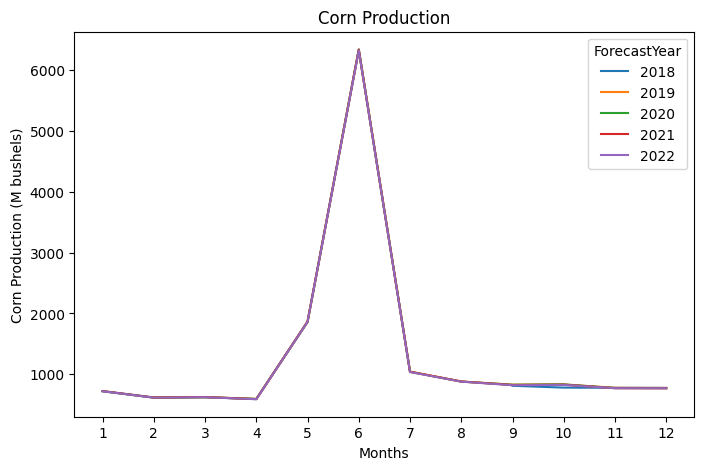

In [9]:
#Plot the graph for Corn prodution for 5 years and save the output file
usda_us_corn_total_graph = usda_us_corn_total.pivot(index='ForecastMonth', columns='ForecastYear', values='Value')
usda_us_corn_total_graph.plot(figsize=(8,5))
plt.xlabel("Months")
plt.ylabel("Corn Production (M bushels)")
plt.xticks(np.arange(1, 13, 1.0))
plt.title("Corn Production")
plt.savefig("output/corn_production.png")

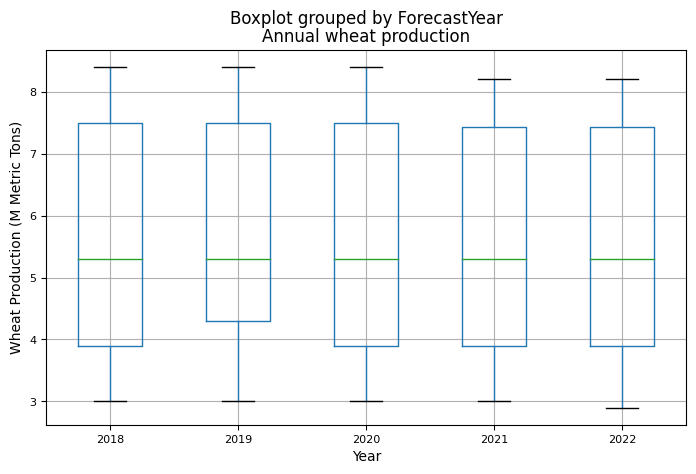

In [47]:
#Aggregate the wheat production data
usda_us_wheat_total=usda_us_wheat_data.groupby(['Commodity','ForecastYear','ForecastMonth']).sum()['Value'].reset_index()
wheat_plot=usda_us_wheat_total.boxplot("Value", by="ForecastYear", figsize=(8,5), fontsize=8)
plt.title("Annual wheat production")
plt.xlabel("Year")
plt.ylabel("Wheat Production (M Metric Tons)")
plt.savefig("output/wheat_box_plot")
plt.show()

In [44]:
wheat_2018 = usda_us_wheat_total.loc[usda_us_wheat_total['ForecastYear'] == 2018,"Value"]
wheat_2019 = usda_us_wheat_total.loc[usda_us_wheat_total['ForecastYear'] == 2019,"Value"]
wheat_2020 = usda_us_wheat_total.loc[usda_us_wheat_total['ForecastYear'] == 2020,"Value"]
wheat_2021 = usda_us_wheat_total.loc[usda_us_wheat_total['ForecastYear'] == 2021,"Value"]
wheat_2022 = usda_us_wheat_total.loc[usda_us_wheat_total['ForecastYear'] == 2022,"Value"]


In [45]:
# Perform the ANOVA
stats.f_oneway(wheat_2018,wheat_2019,wheat_2020,wheat_2021,wheat_2022)

F_onewayResult(statistic=0.019151277672360464, pvalue=0.9992598234290129)

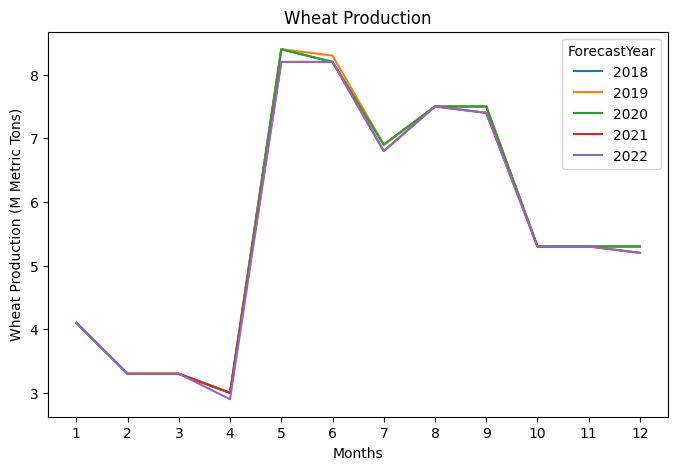

In [11]:
#Plot the graph for Wheat prodution for 5 years and save the output file
usda_us_wheat_total_graph = usda_us_wheat_total.pivot(index='ForecastMonth', columns='ForecastYear', values='Value')
usda_us_wheat_total_graph.plot(figsize=(8,5))
plt.xlabel("Months")
plt.ylabel("Wheat Production (M Metric Tons)")
plt.xticks(np.arange(1, 13, 1.0))
plt.title("Wheat Production")
plt.savefig("output/wheat_production.png")

In [15]:
usda_us_rice_total=usda_us_rice_data.groupby(['Commodity','ForecastYear','ForecastMonth']).sum()['Value'].reset_index()
usda_us_rice_total.head()

,Commodity,ForecastYear,ForecastMonth,Value
0,"RICE, milled",2018,1,0.7
1,"RICE, milled",2018,2,0.6
2,"RICE, milled",2018,3,0.6
3,"RICE, milled",2018,4,0.7
4,"RICE, milled",2018,5,0.8


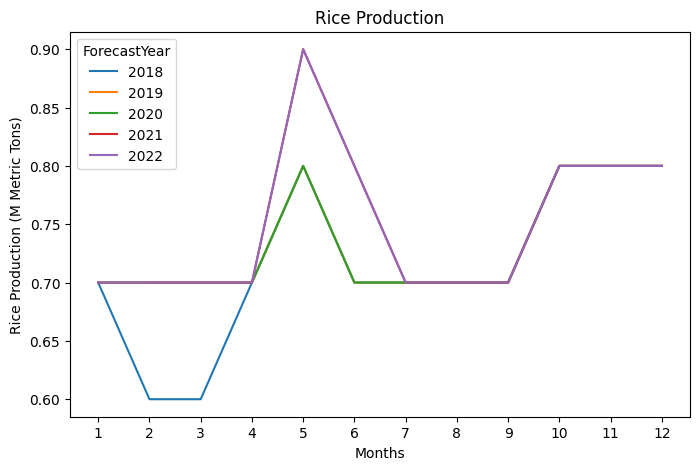

In [14]:
#Plot the graph for Wheat prodution for 5 years and save the output file
usda_us_rice_total_graph = usda_us_rice_total.pivot(index='ForecastMonth', columns='ForecastYear', values='Value')
usda_us_rice_total_graph.plot(kind ='line', figsize=(8,5))
plt.xlabel("Months")
plt.ylabel("Rice Production (M Metric Tons)")
plt.xticks(np.arange(1, 13, 1.0))
plt.title("Rice Production")
plt.savefig("output/rice_production.png")

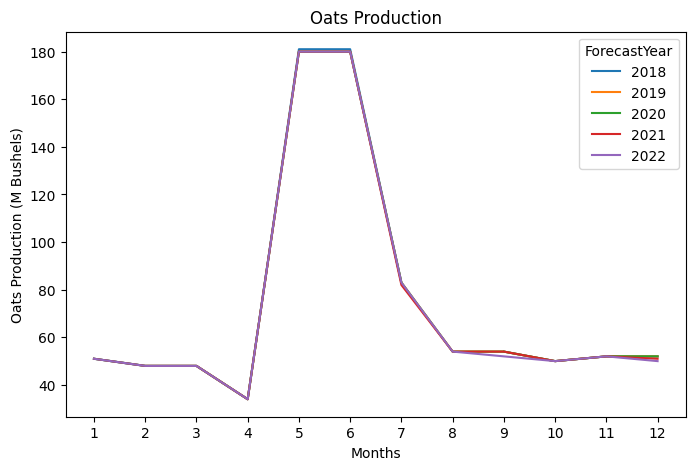

In [12]:
#Aggregate the Oats production data
usda_us_oats_total=usda_us_oats_data.groupby(['Commodity','ForecastYear','ForecastMonth']).sum()['Value'].reset_index()
#Plot the graph for Oats production for 5 years and save the output
usda_us_oats_total_graph = usda_us_oats_total.pivot(index='ForecastMonth', columns='ForecastYear', values='Value')
usda_us_oats_total_graph.plot(figsize=(8,5))
plt.xlabel("Months")
plt.ylabel("Oats Production (M Bushels)")
plt.xticks(np.arange(1, 13, 1.0))
plt.title("Oats Production")
plt.savefig("output/oats_production.png")

In [13]:
#Aggreagte the soybean production data
usda_us_soybean_total=usda_us_soybean_data.groupby(['Commodity','ForecastYear','ForecastMonth']).sum()['Value'].reset_index()
usda_us_soybean_total.head()

,Commodity,ForecastYear,ForecastMonth,Value
0,"Meal, Soybean",2018,1,2744.0
1,"Meal, Soybean",2018,2,2641.0
2,"Meal, Soybean",2018,3,2668.0
3,"Meal, Soybean",2018,4,2672.0
4,"Meal, Soybean",2018,5,5828.0


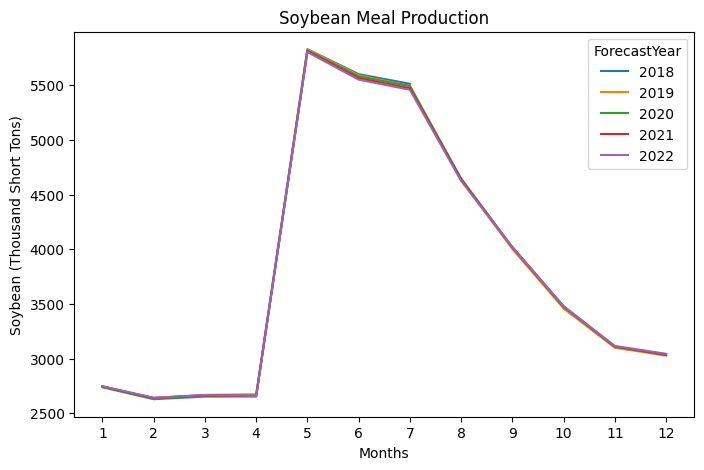

In [14]:
#Plot the soybean production data for 5 years and save the output
usda_us_soybean_total_graph = usda_us_soybean_total.pivot(index='ForecastMonth', columns='ForecastYear', values='Value')
usda_us_soybean_total_graph.plot(figsize=(8,5))
plt.xlabel("Months")
plt.ylabel("Soybean (Thousand Short Tons)")
plt.xticks(np.arange(1, 13, 1.0))
plt.title("Soybean Meal Production")
plt.savefig("output/soybean_production.png")

In [15]:
#Aggregate the milk production
usda_us_milk_total=usda_us_milk_data.groupby(['Commodity','ForecastYear','ForecastMonth']).sum()['Value'].reset_index()
usda_us_milk_total.head()

,Commodity,ForecastYear,ForecastMonth,Value
0,"Milk, Fat Basis",2022,5,883.6
1,"Milk, Fat Basis",2022,6,883.7
2,"Milk, Fat Basis",2022,7,882.3
3,"Milk, Fat Basis",2022,8,882.5
4,"Milk, Fat Basis",2022,9,880.8


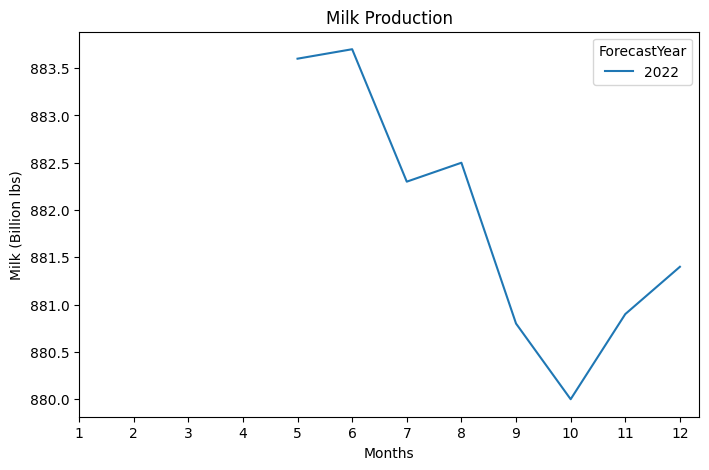

In [16]:
#Plot the milk production graph
usda_us_milk_total_graph = usda_us_milk_total.pivot(index='ForecastMonth', columns='ForecastYear', values='Value')
usda_us_milk_total_graph.plot(figsize=(8,5))
plt.xlabel("Months")
plt.ylabel("Milk (Billion lbs)")
plt.xticks(np.arange(1, 13, 1.0))
plt.title("Milk Production")
plt.savefig("output/milk_production.png")
plt.show()

In [20]:
#Get the meat production data from the csv file
meat_production_data = pd.read_csv("Resources/USDA_US_Meat_Production_2018_2022.csv")
meat_production_data.head()

,Date,Beef,Veal,Pork,Lamb,Total Red Meat,Broilers,Other Chicken,Turkey,Total Poultry,Total Red Meat and Poultry
0,23-Feb,"2,059.30",3.7,"2,148.30",9.3,"4,220.60","3,580.70",43.2,418.9,"4,054.10","8,274.70"
1,23-Jan,"2,287.40",4.3,"2,415.50",9.2,"4,716.40","3,971.90",46.5,445.2,"4,476.10","9,192.50"
2,22-Dec,"2,193.70",4.4,"2,220.40",9.8,"4,428.40","3,851.60",46.0,414.2,"4,324.40","8,752.80"
3,22-Nov,"2,387.60",4.4,"2,340.70",10.0,"4,742.80","3,940.90",45.4,428.2,"4,426.20","9,169.00"
4,22-Oct,"2,363.10",4.4,"2,326.40",9.0,"4,702.90","4,068.50",48.2,467.3,"4,596.40","9,299.30"


In [21]:
#Drop rows with no data
meat_production_data_clean = meat_production_data.dropna()
meat_production_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        62 non-null     object 
 1   Beef                        62 non-null     object 
 2   Veal                        62 non-null     float64
 3   Pork                        62 non-null     object 
 4   Lamb                        62 non-null     float64
 5   Total Red Meat              62 non-null     object 
 6   Broilers                    62 non-null     object 
 7   Other Chicken               62 non-null     float64
 8   Turkey                      62 non-null     float64
 9   Total Poultry               62 non-null     object 
 10  Total Red Meat and Poultry  62 non-null     object 
dtypes: float64(4), object(7)
memory usage: 5.8+ KB


In [22]:
#Seperate the year and month into different columns
meat_production_data_clean['Year']= meat_production_data_clean['Date'].str.slice(0,2).astype(int)
meat_production_data_clean['Year']=meat_production_data_clean['Year']+2000
meat_production_data_clean['Month']= pd.to_datetime(meat_production_data_clean['Date'], format='%y-%b')
meat_production_data_clean['Month']=meat_production_data_clean['Month'].dt.month

#Convert the meat and poultry production data to float dtype
meat_production_data_clean['Total Red Meat'] = meat_production_data_clean['Total Red Meat'].replace(',','', regex=True)
meat_production_data_clean['Total Red Meat'] = meat_production_data_clean['Total Red Meat'].astype(float)
meat_production_data_clean['Total Poultry'] = meat_production_data_clean['Total Poultry'].replace(',','', regex=True)
meat_production_data_clean['Total Poultry'] = meat_production_data_clean['Total Poultry'].astype(float)
meat_production_data_clean['Total Red Meat and Poultry'] = meat_production_data_clean['Total Red Meat and Poultry'].replace(',','', regex=True)
meat_production_data_clean['Total Red Meat and Poultry'] = meat_production_data_clean['Total Red Meat and Poultry'].astype(float)
meat_production_data_clean

,Date,Beef,Veal,Pork,Lamb,Total Red Meat,Broilers,Other Chicken,Turkey,Total Poultry,Total Red Meat and Poultry,Year,Month
0,23-Feb,"2,059.30",3.7,"2,148.30",9.3,4220.6,"3,580.70",43.2,418.9,4054.1,8274.7,2023,2
1,23-Jan,"2,287.40",4.3,"2,415.50",9.2,4716.4,"3,971.90",46.5,445.2,4476.1,9192.5,2023,1
2,22-Dec,"2,193.70",4.4,"2,220.40",9.8,4428.4,"3,851.60",46.0,414.2,4324.4,8752.8,2022,12
3,22-Nov,"2,387.60",4.4,"2,340.70",10.0,4742.8,"3,940.90",45.4,428.2,4426.2,9169.0,2022,11
4,22-Oct,"2,363.10",4.4,"2,326.40",9.0,4702.9,"4,068.50",48.2,467.3,4596.4,9299.3,2022,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,18-May,"2,279.90",6.2,"2,164.00",12.5,4462.6,"3,738.00",46.8,510.1,4306.9,8769.5,2018,5
58,18-Apr,"2,089.40",5.9,"2,131.40",11.5,4238.3,"3,456.30",42.9,481.7,3992.5,8230.8,2018,4
59,18-Mar,"2,174.70",5.9,"2,285.20",13.3,4479.1,"3,489.70",42.8,481.7,4026.4,8505.5,2018,3
60,18-Feb,"1,956.40",5.6,"2,047.10",10.8,4019.9,"3,256.70",38.8,460.3,3767.0,7786.9,2018,2


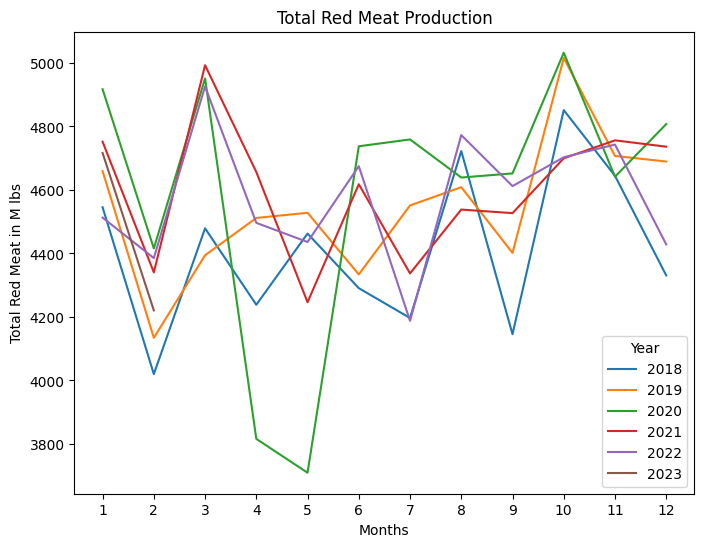

In [20]:
#Plot the total red meat production and save the output
meat_production_data_graph = meat_production_data_clean.pivot(index='Month', columns='Year', values='Total Red Meat')
month_array=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
meat_production_data_graph.plot(figsize=(8,6))
plt.xticks(np.arange(1, 13, 1.0))
plt.xlabel('Months')
plt.ylabel('Total Red Meat in M lbs')
plt.title("Total Red Meat Production")
plt.savefig("output/total_red_meat_production.png")

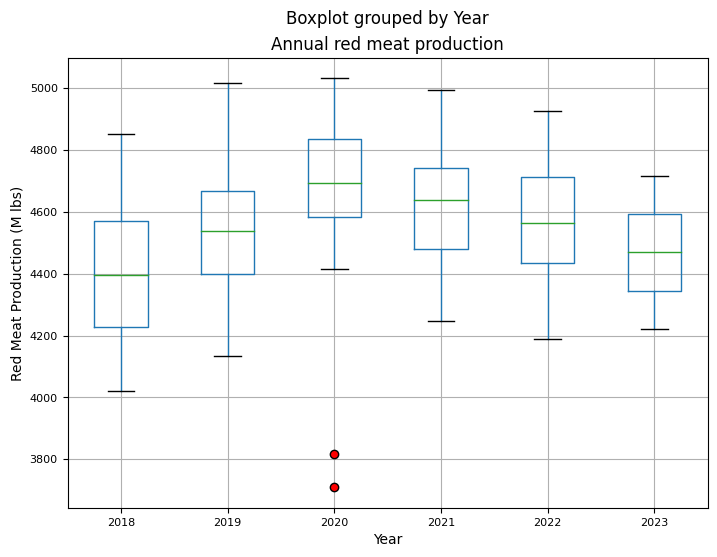

In [51]:
red_meat_plot = meat_production_data_clean.boxplot("Total Red Meat", by="Year", figsize=(8,6), fontsize=8, flierprops=dict(marker='o', markerfacecolor='red'))
plt.title("Annual red meat production")
plt.xlabel("Year")
plt.ylabel("Red Meat Production (M lbs)")
plt.savefig("output/redmeat_box_plot")
plt.show()


In [53]:
redmeat_2018 = meat_production_data_clean.loc[meat_production_data_clean['Year'] == 2018, "Total Red Meat"]
redmeat_2019 = meat_production_data_clean.loc[meat_production_data_clean['Year'] == 2019, "Total Red Meat"]
redmeat_2020 = meat_production_data_clean.loc[meat_production_data_clean['Year'] == 2020, "Total Red Meat"]
redmeat_2021 = meat_production_data_clean.loc[meat_production_data_clean['Year'] == 2021, "Total Red Meat"]
redmeat_2022 = meat_production_data_clean.loc[meat_production_data_clean['Year'] == 2022, "Total Red Meat"]

In [54]:
# Perform the ANOVA
stats.f_oneway(redmeat_2018,redmeat_2019,redmeat_2020,redmeat_2021,redmeat_2022)

F_onewayResult(statistic=0.9521461004734535, pvalue=0.44111278005521637)

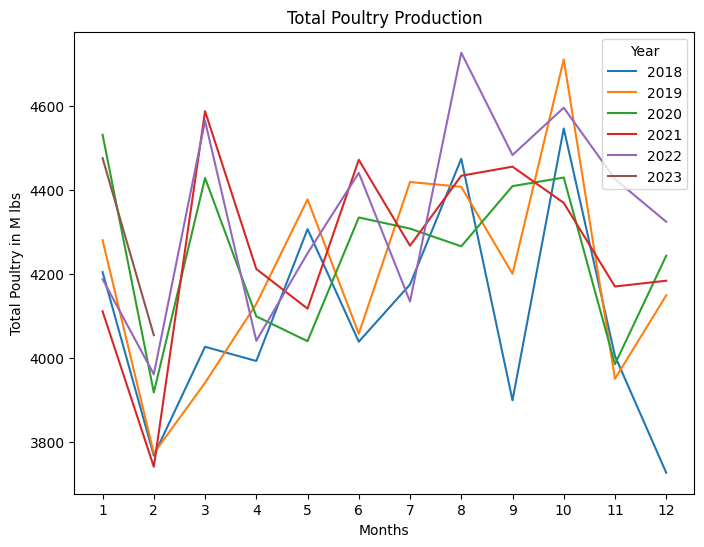

In [21]:
#Plot the total poultry production and save the output
meat_production_data_graph = meat_production_data_clean.pivot(index='Month', columns='Year', values='Total Poultry')
month_array=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
meat_production_data_graph.plot(figsize=(8,6))
plt.xticks(np.arange(1, 13, 1.0))
plt.xlabel('Months')
plt.ylabel('Total Poultry in M lbs')
plt.title("Total Poultry Production")
plt.savefig("output/total_poultry_production.png")

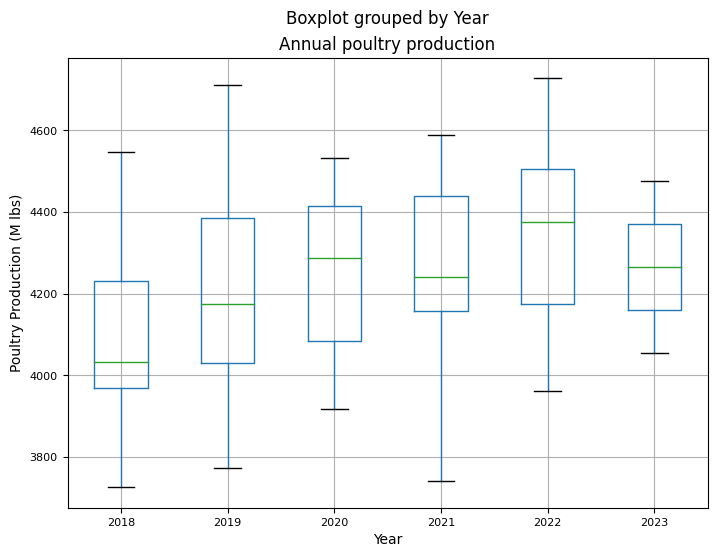

In [55]:
red_meat_plot = meat_production_data_clean.boxplot("Total Poultry", by="Year", figsize=(8,6), fontsize=8, flierprops=dict(marker='o', markerfacecolor='red'))
plt.title("Annual poultry production")
plt.xlabel("Year")
plt.ylabel("Poultry Production (M lbs)")
plt.savefig("output/poultry_box_plot")
plt.show()